Davies-Bouldin Index: 1.4693
Dunn Index: 0.0052


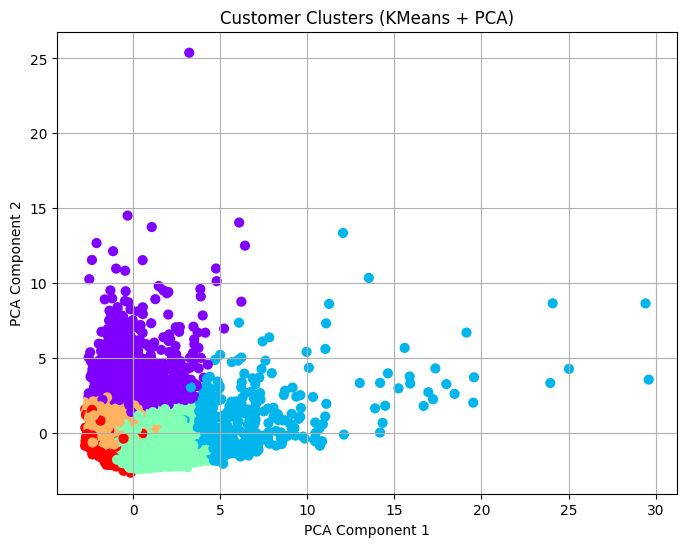

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, pairwise_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ------------------------------
# Step 1: Load and preprocess data
# ------------------------------
df = pd.read_csv("/Users/muskan/deeplearning/bda/CC GENERAL.csv")
df.drop(columns=['CUST_ID'], inplace=True)
df.fillna(df.mean(), inplace=True)

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Optional: Reduce dimensionality for visualization & performance
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# ------------------------------
# Step 2: Apply KMeans Clustering
# ------------------------------
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(data_scaled)

# ------------------------------
# Step 3: Evaluate Cluster Quality
# ------------------------------
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    inter_dists = []
    intra_dists = []

    for i in unique_labels:
        Xi = X[labels == i]
        intra = pairwise_distances(Xi)
        intra_dists.append(np.max(intra))

        for j in unique_labels:
            if i < j:
                Xj = X[labels == j]
                inter = pairwise_distances(Xi, Xj)
                inter_dists.append(np.min(inter))

    return np.min(inter_dists) / np.max(intra_dists)

db_index = davies_bouldin_score(data_scaled, labels)
dunn = dunn_index(data_scaled, labels)

print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Dunn Index: {dunn:.4f}")

# ------------------------------
# Step 4: Visualize the Clusters
# ------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='rainbow', s=40)
plt.title("Customer Clusters (KMeans + PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()